# ISIS3301 - Inteligencia de Negocios
## Proyecto 1 Etapa 1 - Analítica de Textos (2024-20)

Nicolás Casas - 202212190

Santiago Jaimes - 201912921

Nicolás Rincón - 202021963

# Importación e Instalación de Librerías

In [5]:
pd.set_option('display.max_colwidth', None)

# Renombrar las columnas para que sean más descriptivas
df_ods_textos.rename(columns={'Textos_espanol': 'Textos', 'sdg': 'Categoria'}, inplace=True)
df_dim = df_ods_textos.shape

# Mostrar el diccionario con las columnas correctas
print(">> Los textos en bruto son los siguientes: ")
print(">> El dataframe contiene " + str(df_dim[1]) + " columnas y "+ str(df_dim[0]) +" filas\n")
df_ods_textos[['Textos','Categoria']]

>> Los textos en bruto son los siguientes: 
>> El dataframe contiene 2 columnas y 4049 filas



,Textos,Categoria
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3
3,"Por ejemplo, el estado australiano de Victoria creó una agencia de promoción de la salud financiada con los impuestos sobre el tabaco, y varios estados de EE.UU. (California, Massachusetts, Arizona y Oregón) han destinado parte de los ingresos procedentes de los impuestos especiales sobre el tabaco a actividades de educación y control del tabaco, mientras que en Nueva Jersey, Ohio y Texas los ingresos procedentes del alcohol se utilizan para programas de educación y prevención relacionados con el alcohol (Sassi et al., 2004), Los impuestos locales pueden ser una fuente importante de ingresos, sobre todo en los sistemas sanitarios descentralizados (por ejemplo, Dinamarca, Finlandia, Italia y Suecia)17 . Además, el nivel de los impuestos locales puede fijarse en función de las preferencias locales sobre el nivel y la calidad de los servicios médicos. Sin embargo, en ausencia de un mecanismo de transferencia ajustado al riesgo y gestionado centralmente, la descentralización reduce la mancomunación de riesgos y podría dar lugar a mayores disparidades sanitarias interregionales.",3
4,"El consumo anual de alcohol se estima en 15,7 litros al año para los hombres, más de un 50% por encima de la media de la OCDE (10,4) (Sistema mundial de información sobre alcohol y salud de la OMS), lo que puede ayudar a explicar la a

Revisamos los tipos de dato de las columnas del DataFrame.

In [6]:
df_ods_textos.dtypes

,0
Textos,object
Categoria,int64


# 2 Entendimiento de los Datos

Se crea una copia del DataFrame con los datos, con el objetivo de evitar que haya sobreescritura de la información y cambios indeseados sobre el conjunto original. Así, se asegura su pureza.


In [7]:
textos = df_ods_textos.copy()

Se realiza la extracción de estadísticas descriptivas para entender los datos. Las estadísticas seleccionadas describen lo siguiente:

* **Conteo:** Cantidad de caracteres en el texto
* **Palabras únicas:** Cantidad de palabras únicas en el texto (palabras diferentes)
* **Moda:** La palabra que más se repite en el texto
* **Max:** Longitud de la palabra más larga del texto
* **Min:** Longitud de la palabra más corta del texto

In [8]:
textos['Conteo'] = [len(x) for x in textos['Textos']]
textos['Palabras únicas'] = [len(set(x)) for x in textos['Textos']]
textos['Moda'] = [max(set(x.split(" ")), key = x.split(" ").count) for x in textos["Textos"]]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Textos']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Textos']]

textos.head()

,Textos,Categoria,Conteo,Palabras únicas,Moda,Max,Min
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,944,55,de,18,1
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,476,38,los,14,1
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,1207,43,de,15,1
3,"Por ejemplo, el estado australiano de Victoria creó una agencia de promoción de la salud financiada con los impuestos sobre el tabaco, y varios estados de EE.UU. (California, Massachusetts, Arizona y Oregón) han destinado parte de los ingresos procedentes de los impuestos especiales sobre el tabaco a actividades de educación y control del tabaco, mientras que en Nueva Jersey, Ohio y Texas los ingresos procedentes del alcohol se utilizan para programas de educación y prevención relacionados con el alcohol (Sassi et al., 2004), Los impuestos locales pueden ser una fuente importante de ingresos, sobre todo en los sistemas sanitarios descentralizados (por ejemplo, Dinamarca, Finlandia, Italia y Suecia)17 . Además, el nivel de los impuestos locales puede fijarse en función de las preferencias locales sobre el nivel y la calidad de los servicios médicos. Sin embargo, en ausencia de un mecanismo de transferencia ajustado al riesgo y gestionado centralmente, la descentralización reduce la mancomunación de riesgos y podría dar lugar a mayores disparidades sanitarias interregionales.",3,1090,54,de,17,1
4,"El consumo anual de alcohol se estima en 15,7 litros al año para los hombres, más de un 50% por encima de la media de la OCDE (10,4) (S

## 2.1 Exploración de datos

In [9]:
# Se realiza un perfilamiento de los datos con la librería pandas profiling
ProfileReport(textos)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Se realiza un histograma de la Categoría asociada al ODS de los documentos en el corpus. Así se puede apreciar cuántos textos hay de cada categoría en el conjunto de datos original. Los valores específicos se pueden consultar en el perfilamiento de la columna Categoria.

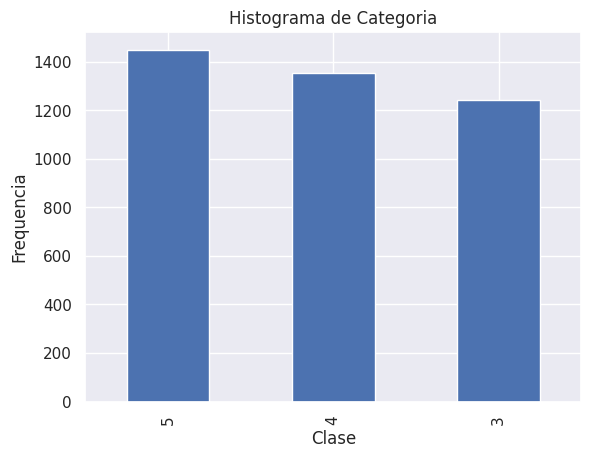

In [10]:
textos['Categoria'].value_counts().plot(kind="bar")
plt.xlabel('Clase')
plt.ylabel('Frequencia')
plt.title('Histograma de Categoria')
plt.show()

Se realiza una tabla donde se muestra un ejemplo de texto de cada categoría.

In [11]:
pd.set_option('display.max_colwidth', None)

clases_muestra = df_ods_textos['Categoria'].unique()
comentarios_muestra = []
for clase in clases_muestra:
    comentario = df_ods_textos[df_ods_textos['Categoria'] == clase]['Textos'].iloc[0]
    comentarios_muestra.append(comentario)
tabla_muestra = pd.DataFrame({'Categoria': clases_muestra, 'Textos': comentarios_muestra})
tabla_muestra.sort_values('Categoria', inplace=True)

tabla_muestra

,Categoria,Textos
0,3,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP."
1,4,"En promedio, en los países de la OCDE en 2016, alrededor del 85 % de los estudiantes de educación secundaria inferior estaban matriculados en instituciones públicas. Entre todos los países de la OCDE y socios, solo Bélgica, Chile y el Reino Unido tienen más del 50% de los estudiantes matriculados en este nivel en instituciones privadas, que incluyen un gran porcentaje de estudiantes matriculados en instituciones privadas dependientes del gobierno. En el nivel secundario superior, la proporción de matriculados en instituciones públicas cae al 80 % en promedio en los países de la OCDE, con una disminución de más de 20 puntos porcentuales en Islandia, Japón y Corea, donde las instituciones privadas desempeñan un papel más destacado en este nivel."
2,5,"Sin embargo, un plan de negocios preparado juiciosamente requiere herramientas expertas y asesoramiento profesional que pueden ser inaccesibles para muchas mujeres empresarias. Esto es especialmente relevante ya que estudios previos muestran que las mujeres emprendedoras tienen una fuerte preferencia por los bancos como “socios” en lugar de tratar con ellos en una relación meramente transaccional (Vital Voices, 2012). Suelen tener requisitos de diligencia debida más rigurosos para las PYME que los bancos de otras regiones."


El conteo, media, desviación estándar y cuartiles de cada una de las columnas se muestran con el método `describe()` o se pueden consultar con más detalle en el perfilamiento en la pestaña de Statistics de cada columna.

In [12]:
textos.describe()

,Categoria,Conteo,Palabras únicas,Max,Min
count,4049.000000,4049.000000,4049.000000,4049.000000,4049.000000
mean,4.051124,699.632502,41.514448,15.305508,0.967399
std,0.814338,228.988965,6.843526,3.888995,0.208335
min,3.000000,294.000000,27.000000,9.000000,0.000000
25%,3.000000,531.000000,36.000000,14.000000,1.000000
50%,4.000000,657.000000,41.000000,15.000000,1.000000
75%,5.000000,827.000000,46.000000,16.000000,1.000000
max,5.000000,1513.000000,71.000000,83.000000,2.000000


Se utiliza una distribución de frecuencias de la librería de procesamiento de lenguaje natural para visualizar cuáles son las palabras más frecuentes en todo el corpus y de ahí en adelante ejemplos de palabras que se encuentran con menor frecuencia.

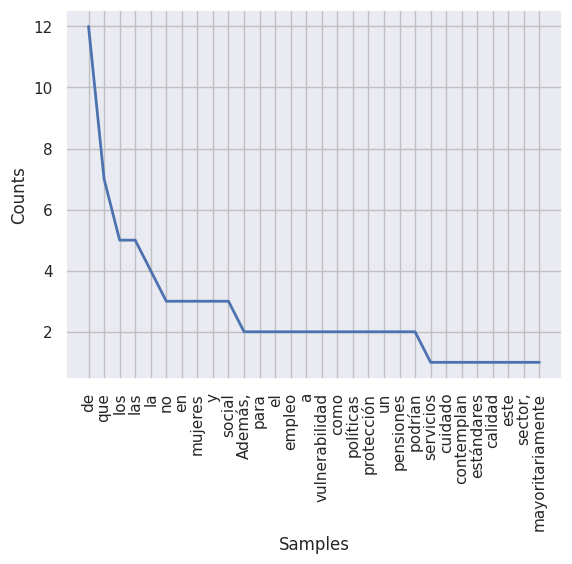

<Axes: xlabel='Samples', ylabel='Counts'>

In [13]:
from nltk.probability import *
import random

fdist = FreqDist(df_ods_textos['Textos'][random.randint(0, df_ods_textos.shape[0])].split(' '))
fdist.plot(30, cumulative = False)

Finalmente, para acabar con el entendimiento de los datos, se realiza un análisis de los idiomas presentes en el corpus de documentos. Se emplea el método `detect()` de la librería `langdetect` para tal fin.

In [14]:
def detect_language(text):
    """Function that detects the language of a specific text"""
    try:
        lang = detect(text)
        return lang
    except:
        return None

# Detectamos el idioma de un registro
df_ods_textos['Idioma'] = df_ods_textos['Textos'].apply(detect_language)

# Calcular el porcentaje de idioma
idiomas = df_ods_textos['Idioma'].value_counts() / df_ods_textos.shape[0]
idiomas

,count
Idioma,
es,0.996542
en,0.001976
fr,0.001482


## 2.2 Verificación de Calidad

**COMPLETITUD:**


Se llevará a cabo un análisis de completitud para evaluar si los datos están completos. Este análisis tiene como objetivo identificar la proporción de valores nulos en cada columna del DataFrame, lo que permitirá determinar el nivel de falta de datos en el conjunto y si es necesario realizar algún ajuste por imputación o eliminación de registros.

In [15]:
((textos.isnull().sum()/textos.shape[0])).sort_values(ascending=False)

,0
Textos,0.0
Categoria,0.0
Conteo,0.0
Palabras únicas,0.0
Moda,0.0
Max,0.0
Min,0.0


Como se puede apreciar, no hay datos ausentes. Todos los registros tienen datos en sus dos columnas.

**UNICIDAD:**

En este momento se busca encontrar campos con valores duplicados. Los registros duplicados se eliminan.

In [16]:
duplicates = textos.duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicates: ", num_duplicates)

Number of duplicates:  0


In [17]:
textos.duplicated(keep = False).sum()

0

Como se puede apreciar, no había registros duplicados en el dataset original, por lo que al aplicar la eliminación, sigue marcando correctamente la existencia de 0 registros duplicados. La no duplicidad también se puede apreciar en el Pandas Profiling.

**CONSISTENCIA:**

Según la información proporcionada, los valores ya son consistentes puesto que en la columna para los textos está en formato Object y categoría ya es un Int. Adicionalmente, las columnas agregadas en el entendimiento de las estadísticas descriptivas son consistentes en tipo. El conteo, el número de palabras únicas, la longitud máxima y la longitud mínima son números, toda vez que la moda (la palabra que más se repite en cada registro) es un objeto, correctamente tratado como texto.

In [18]:
textos.dtypes

,0
Textos,object
Categoria,int64
Conteo,int64
Palabras únicas,int64
Moda,object
Max,int64
Min,int64


Sin embargo, revisando algunas muestras de texto del Pandas Profiling, es posible apreciar que la columna Text contiene algunos caracteres mal codificados como `Ã¡`; en particular, son caracteres que aparecen cuando se codifican erróneamente las tildes y otros símbolos propios del español (como la ñ, por ejemplo).

Al estar distribuidos por todos los registros de texto, este error de consistencia se arreglará en la limpieza de datos.

**VALIDEZ:**

Por último, se analiza la validez del conjunto de datos en términos de sus valores numéricos (categóricos en este caso y que corresponden a la variable de la etiqueta). Se busca la presencia de outliers.

In [19]:
textos['Categoria'].unique()

array([3, 4, 5])

Según la información observada No hay valores atípicos en la columna categoría. Todos los valores del conjunto se encuentran clasificados por el experto entre los ODS 3, 4 y 5.

# 3 Preparación de los Datos

## 3.1 Limpieza de datos

Este proceso de limpieza se compone de dos etapas: corrección y eliminación de ruido.

La **Corrección** centrará en el arreglo primordial de errores de codificación en UTF-8 de algunos de los textos (en particular, debido a errores en los textos con acentos, caracteres especiales y letras propias del idioma español).

In [20]:
# Mapeo de caracteres mal representados a sus correspondientes en español
replacement_map = {
    'Ã¡': 'á',
    'Ã©': 'é',
    'Ã­': 'í',
    'Ã³': 'ó',
    'Ãº': 'ú',
    'Ã±': 'ñ',
    'Ã‘': 'Ñ',
    'Â¡': '¡',
    'Â¿': '¿',
    'Â´': '´',
    'â€œ': '“',
    'â€': '”',
    'â€˜': '‘',
    'â€™': '’',
    'â€¢': '•'
}

def correct_encoding_errors(text):
    """Correct common encoding errors in a given text"""
    for wrong, right in replacement_map.items():
        text = text.replace(wrong, right)
    return text

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('latin1', errors='ignore').decode('utf-8', errors='ignore')
        new_words.append(new_word)
    return new_words

A continuación, la **Eliminación del Ruido** se realizará ajustando el texto arreglado a estándares unificados que faciliten la interpretación de las palabras en otro proceso futuro. Se realizan tres acciones en esta etapa:

* Conversión de los textos a minúsculas
* Remoción de los signos de puntuación
* Reemplazo de los números a palabras

Para este tercer proceso, cabe resaltar que se tuvo que implementar un ajuste respecto al método template por defecto para corregir los números al idioma español. Adicionalmente, fue necesario realizar un ajuste manual para que convirtiera los textos con porcentajes correctamente. Por ejemplo, `"34%"` lo convierte a `"treinta y cuatro por ciento"`.

In [21]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    new_words = []
    for word in words:
        # Check if the word is a percentage
        if word.endswith('%'):
            try:
                # Remove the % sign and convert the number to words
                number = float(word[:-1].replace(',', '.'))
                new_word = num2words(number, lang='es') + ' por ciento'
            except ValueError:
                new_word = word
            new_words.append(new_word)
        # Check if the word is a digit (integer)
        elif word.isdigit():
            new_word = num2words(word, lang='es')
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

Se toma ahora la decisión de retirar las Stopwords. Esto debido a que, en su mayoría, el conjunto se compone de artículos, preposiciones y conjunciones. Todas las anteriores partes del lenguaje no tienen valor semántico por sí mismas. Considerando que los algoritmos de procesamiento de texto y vectorización eliminan el contexto del Bag of Words, se toma la decisión de eliminarlas por completo pues no serían relevantes o indicativas del significado de ninguno de los textos.

In [22]:
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [23]:
def remove_stopwords(words, stopwords=stopwords.words('spanish')):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

Finalmente, se construye una función que realiza el procesamiento de texto completo al conjunto de palabras que le llega por parámetro.

In [24]:
def preprocessing(words):
    text = ' '.join(words)
    text = correct_encoding_errors(text)
    words = text.split()
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

## 3.2 Tokenización

Para realizar la Tokenización, se toma la decisión de dividir el texto en sus palabras. Cada palabra se convierte en un token al momento de realizar el parsing de cada uno de los registros del DataFrame.

Ahora bien, no se realiza la corrección de las contracciones en caso de que haya alguna (es poco probable porque en español no hay contracciones que no estén contempladas en las stopwords, como "de el" que se junta como "del").

In [25]:
#Aplica la corrección de las contracciones
#df_ods_textos['Textos'] = df_ods_textos['Textos'].apply(contractions.fix)

Además, como más del 99% del corpus se encuentra en español, vale la pena retirar los registros a los que se les haya detectado idioma inglés y francés, con el objetivo de depurar más aún los datos que entrarán al modelo. Por otro lado, cabe resaltar que no hay registros faltantes ni duplicados, por lo que la eliminación de menos del 1% de los registros no debería tener efectos significativos sobre las predicciones.

In [26]:
# Filtrado de los registros en español
df_ods_textos = df_ods_textos[df_ods_textos['Idioma']=='es']
df_ods_espaniol = df_ods_textos.shape

print("Se han filtrado los textos escritos sólo en español.\n")
print(">> El DataFrame tiene {0} filas y {1} columnas".format(df_ods_espaniol[0], df_ods_espaniol[1]))
df_ods_textos.head()

Se han filtrado los textos escritos sólo en español.

>> El DataFrame tiene 4035 filas y 3 columnas


,Textos,Categoria,Idioma
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,es
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,es
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,es
3,"Por ejemplo, el estado australiano de Victoria creó una agencia de promoción de la salud financiada con los impuestos sobre el tabaco, y varios estados de EE.UU. (California, Massachusetts, Arizona y Oregón) han destinado parte de los ingresos procedentes de los impuestos especiales sobre el tabaco a actividades de educación y control del tabaco, mientras que en Nueva Jersey, Ohio y Texas los ingresos procedentes del alcohol se utilizan para programas de educación y prevención relacionados con el alcohol (Sassi et al., 2004), Los impuestos locales pueden ser una fuente importante de ingresos, sobre todo en los sistemas sanitarios descentralizados (por ejemplo, Dinamarca, Finlandia, Italia y Suecia)17 . Además, el nivel de los impuestos locales puede fijarse en función de las preferencias locales sobre el nivel y la calidad de los servicios médicos. Sin embargo, en ausencia de un mecanismo de transferencia ajustado al riesgo y gestionado centralmente, la descentralización reduce la mancomunación de riesgos y podría dar lugar a mayores disparidades sanitarias interregionales.",3,es
4,"El consumo anual de alcohol se estima en 15,7 litros al año para los hombres, más de un 50% por encima de la media de la OCDE (10,4) (Sistema mundial de información sobre alcohol y salud de la OMS), lo que puede ayu

Se aplica la tokenización en palabras y el método de preprocesamiento sobre los registros filtrados en español sin contracciones.

In [27]:
#Aplica la eliminación del ruido
df_ods_textos['words']  = df_ods_textos['Textos'].apply(word_tokenize).apply(preprocessing)

df_ods_textos.head()

,Textos,Categoria,Idioma,words
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,es,"[ejemplo, numero, consultas, externas, especialistas, trescientos diecinueve, cada, mil, derechohabientes, sp, comparacion, trescientos treinta y ocho, seiscientos veinte, cada, mil, derechohabientes, imss, issste, respectivamente, si, bien, diferencias, pueden, reflejar, necesidad, desigual, poblacion, ligeramente, mayor, issste, pueden, justificarse, manera, numero, recetas, pudieron, ser, surtidas, totalidad, farmaceutico, debido, falta, existencias, treinta y tres, dentro, sp, comparacion, catorce, dentro, imss, segun, datos, encuesta, aunque, propias, cifras, institutos, ss, sugieren, tasas, mas, altas, recetas, surtidas, ambas, cifras, encuentran, mas, altas, ocde, gasto, bolsillo, reducido, significativamente, ultima, decada, pesar, esfuerzos, lograr, cobertura, sanitaria, universal, traves, reforma, sp]"
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,es,"[dos mil siete, gobierno, central, financio, directamente, solo, 03, gasto, total, salud, realizo, transferencias, especificas, gasto, salud, ascendieron, 56, gasto, total, mayor, parte, gasto, presupuestario, salud, realizan, gobiernos, condados, condados, pobres, solo, pueden, ofrecer, bajo, nivel, atencion, poblacion, local, gobierno, provincial, proporciona, subsidios, lado, oferta, hospitales]"
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,es,"[claramente, factores, juego, particular, variedad, barreras, determinantes, socia

## 3.3 Normalización

Para el proceso de normalización, se realiza un Stemming y una Lematización. Estos dos procesos se encargan de eliminar los prefijos y sufijos de las palabras, así como de generar la raíz léxica de las palabras.

De esta manera, reducen la cantidad de palabras del corpus al quitar todas las variantes posibles.

In [28]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = SnowballStemmer('spanish')
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas

df_ods_textos['words_stem'] = df_ods_textos['words'].apply(stem_words)
df_ods_textos['words_lemma'] = df_ods_textos['words'].apply(lemmatize_verbs)
df_ods_textos['words'] = df_ods_textos['words'].apply(stem_and_lemmatize)
df_ods_textos

,Textos,Categoria,Idioma,words,words_stem,words_lemma
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,es,"[ejempl, numer, consult, extern, especial, trescientos diecinuev, cad, mil, derechohabient, sp, compar, trescientos treinta y och, seiscientos veint, cad, mil, derechohabient, imss, issste, respect, si, bien, diferent, pued, reflej, neces, desigual, poblacion, liger, mayor, issste, pued, justific, maner, numer, recet, pud, ser, surt, total, farmaceut, deb, falt, existent, treinta y tr, dentr, sp, compar, catorc, dentr, imss, segun, dat, encuest, aunqu, propi, cifr, institut, ss, sugier, tas, mas, altas, recet, surt, ambas, cifr, encuentr, mas, altas, ocde, gast, bolsill, reduc, signific, ultim, dec, pes, esfuerz, logr, cobertur, sanitari, universal, trav, reform, sp, ejemplo, numero, consultas, externas, especialistas, trescientos diecinueve, cada, mil, derechohabientes, sp, comparacion, trescientos treinta y ocho, seiscientos veinte, cada, mil, ...]","[ejempl, numer, consult, extern, especial, trescientos diecinuev, cad, mil, derechohabient, sp, compar, trescientos treinta y och, seiscientos veint, cad, mil, derechohabient, imss, issste, respect, si, bien, diferent, pued, reflej, neces, desigual, poblacion, liger, mayor, issste, pued, justific, maner, numer, recet, pud, ser, surt, total, farmaceut, deb, falt, existent, treinta y tr, dentr, sp, compar, catorc, dentr, imss, segun, dat, encuest, aunqu, propi, cifr, institut, ss, sugier, tas, mas, altas, recet, surt, ambas, cifr, encuentr, mas, altas, ocde, gast, bolsill, reduc, signific, ultim, dec, pes, esfuerz, logr, cobertur, sanitari, universal, trav, reform, sp]","[ejemplo, numero, consultas, externas, especialistas, trescientos diecinueve, cada, mil, derechohabientes, sp, comparacion, trescientos treinta y ocho, seiscientos veinte, cada, mil, derechohabientes, imss, issste, respectivamente, si, bien, diferencias, pueden, reflejar, necesidad, desigual, poblacion, ligeramente, mayor, issste, pueden, justificarse, manera, numero, recetas, pudieron, ser, surtidas, totalidad, farmaceutico, debido, falta, existencias, treinta y tres, dentro, sp, comparacion, catorce, dentro, imss, segun, datos, encuesta, aunque, propias, cifras, institutos, ss, sugieren, tasas, mas, altas, recetas, surtidas, ambas, cifras, encuentran, mas, altas, ocde, gasto, bolsillo, reducido, significativamente, ultima, decada, pesar, esfuerzos, lograr, cobertura, sanitaria, universal, traves, reforma, sp]"
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,es,"[dos mil siet, gobiern, central, financi, direct, sol, 03, gast, total, salud, realiz, transferent, especif, gast, salud, ascend, 56, gas

## 3.4 Vectorización

Se selecciona la columna para vectorizar como la de las palabras procesadas después del stemming y la lematización. Se aprovecha para sacarlas de la lista y juntarlas mediante mapeo separadas por espacios. Esto facilita la creación del Bag of Words para su codifiación.

In [29]:
df_ods_textos['words'] = df_ods_textos['words'].apply(lambda x: ' '.join(map(str, x)))
df_ods_textos['words_stem'] = df_ods_textos['words_stem'].apply(lambda x: ' '.join(map(str, x)))
df_ods_textos['words_lemma'] = df_ods_textos['words_lemma'].apply(lambda x: ' '.join(map(str, x)))
df_ods_textos

,Textos,Categoria,Idioma,words,words_stem,words_lemma
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,es,ejempl numer consult extern especial trescientos diecinuev cad mil derechohabient sp compar trescientos treinta y och seiscientos veint cad mil derechohabient imss issste respect si bien diferent pued reflej neces desigual poblacion liger mayor issste pued justific maner numer recet pud ser surt total farmaceut deb falt existent treinta y tr dentr sp compar catorc dentr imss segun dat encuest aunqu propi cifr institut ss sugier tas mas altas recet surt ambas cifr encuentr mas altas ocde gast bolsill reduc signific ultim dec pes esfuerz logr cobertur sanitari universal trav reform sp ejemplo numero consultas externas especialistas trescientos diecinueve cada mil derechohabientes sp comparacion trescientos treinta y ocho seiscientos veinte cada mil derechohabientes imss issste respectivamente si bien diferencias pueden reflejar necesidad desigual poblacion ligeramente mayor issste pueden justificarse manera numero recetas pudieron ser surtidas totalidad farmaceutico debido falta existencias treinta y tres dentro sp comparacion catorce dentro imss segun datos encuesta aunque propias cifras institutos ss sugieren tasas mas altas recetas surtidas ambas cifras encuentran mas altas ocde gasto bolsillo reducido significativamente ultima decada pesar esfuerzos lograr cobertura sanitaria universal traves reforma sp,ejempl numer consult extern especial trescientos diecinuev cad mil derechohabient sp compar trescientos treinta y och seiscientos veint cad mil derechohabient imss issste respect si bien diferent pued reflej neces desigual poblacion liger mayor issste pued justific maner numer recet pud ser surt total farmaceut deb falt existent treinta y tr dentr sp compar catorc dentr imss segun dat encuest aunqu propi cifr institut ss sugier tas mas altas recet surt ambas cifr encuentr mas altas ocde gast bolsill reduc signific ultim dec pes esfuerz logr cobertur sanitari universal trav reform sp,ejemplo numero consultas externas especialistas trescientos diecinueve cada mil derechohabientes sp comparacion trescientos treinta y ocho seiscientos veinte cada mil derechohabientes imss issste respectivamente si bien diferencias pueden reflejar necesidad desigual poblacion ligeramente mayor issste pueden justificarse manera numero recetas pudieron ser surtidas totalidad farmaceutico debido falta existencias treinta y tres dentro sp comparacion catorce dentro imss segun datos encuesta aunque propias cifras institutos ss sugieren tasas mas altas recetas surtidas ambas cifras encuentran mas altas ocde gasto bolsillo reducido significativamente ultima decada pesar esfuerzos lograr cobertura sanitaria universal traves reforma sp
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden

Se divide el DataFrame en los textos procesados (a vectorizar) y las categorías.

In [ ]:
X_data, y_data = df_ods_textos['words'], df_ods_textos['Categoria']

Finalmente, se emplea un Vectorizador sobre la bolsa de palabras procesadas. El método de vectorización seleccionado es el **tf-idf**.

Se seleccionó este método debido a que la vectorización es eficiente y tiene los siguientes efectos deseables sobre el corpus de palabras:

* <u>Equilibrio de la frecuencia</u>, con lo que reduce la importancia de palabras que se repiten mucho, toda vez que incrementa la de palabras que aparecen pocas veces.
* <u>Equilibrio de la relevancia</u>, con lo que reduce la relevancia de palabras que se repiten en varios textos del corpus, haciendo que las más específicas sean tenidas más en cuenta como características distinguibles de los documentos.
* <u>Es ampliamente utilizado en aplicaciones de clasificación de texto</u>

Se selecciona como hiperparámetro del vectorizador un número de máximo 10000 features codificados. Es decir, el DataFrame resultante tendrá no más de 10000 columnas numéricas. Se decidió esto porque el tener un número excesivo de atributos codificados podría llevar a que los modelos se sobreajusten o que se subajusten en el caso contrario. Además, implicaría un tiempo de procesamiento computacional elevado. Nótese nuevamente que sólo se vectoriza la columna 'words'.

In [ ]:
tf_idf = TfidfVectorizer(max_features=10000)
X_tf_idf = tf_idf.fit_transform(X_data)

print(">> Se ha vectorizado el texto procesado mediante tf-idf\n")
print(">> El DataFrame tiene {0} filas y {1} columnas".format(X_tf_idf.shape[0], X_tf_idf.shape[1]))
pd.DataFrame(X_tf_idf.toarray()).iloc[:, : 50].head()

>> Se ha vectorizado el texto procesado mediante tf-idf

>> El DataFrame tiene 4036 filas y 10000 columnas


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.244629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 4 Creación del Pipeline de datos

Siguiendo los pasos descritos previamente en cuanto a limpieza, tokenización, normalización y vectorización, se crea un pipeline de procesamiento de los datos. Este pipeline genera como salida un arreglo de Numpy con la codificación tf-idf del texto tras el proceso de limpieza, tokenización y normalización.

In [ ]:
def pipeline_datos(df: pd.DataFrame):
  # Realizar una copia del conjunto de datos
  df_pipeline = df.copy()

  # Renombrar las columnas para que sean más descriptivas
  df_pipeline.rename(columns={'Textos_espanol': 'Textos'}, inplace=True)

  # Aplicar el preprocesamiento
  df_pipeline['words'] = df_pipeline['Textos'].apply(word_tokenize).apply(preprocessing)
  df_pipeline['words'] = df_pipeline['words'].apply(stem_and_lemmatize)
  df_pipeline['words'] = df_pipeline['words'].apply(lambda x: ' '.join(map(str, x)))

  # Realizar la vectorización con el tf-idf ya con fit_transform
  X_data = df_pipeline['words']
  X_tf_idf = tf_idf.transform(X_data)

  return X_tf_idf

Este pipeline será utilizado posteriormente para procesar los datos de validación.

En este momento, se realiza el guardado y exportación de datos procesados en un archivo aparte para entregar.

In [ ]:
prueba_pipeline = df_ods_textos.copy()
datos_procesados = pd.DataFrame(pipeline_datos(prueba_pipeline).toarray())
datos_procesados.to_csv('datos_procesados.csv', index=False)

# 5 Creación de Modelos de Clasificación

Para este paso, se tuvo en cuenta que el objetivo final del modelo es servir para una <u>Tarea de Clasificación Multiclase</u>. Con este objetivo en mente, se plantearon cuatro algoritmos posibles para realizar las predicciones:

* Naive Bayes Classifier
* Decision Tree Classifier
* Random Forest Classifier
* Multinominal Logistic Regression

Para estandarizar el proceso de cada uno de los algoritmos, se realiza la división del conjunto de datos en entrenamiento y prueba, con una proporción del 80%-20% de manera aleatoria. Todos los modelos se entrenarán y verificarán con el mismo conjunto de entrenamiento.

In [ ]:
# Defining the Naive Bayes models for each representation
y_data_mod=df_ods_textos['Categoria'].values
X_train, X_test, y_train, y_test= train_test_split(X_tf_idf, y_data, test_size=0.2, random_state=42)

print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

Dimensiones del conjunto de entrenamiento: (3228, 10000)
Dimensiones del conjunto de prueba: (808, 10000)


Los algoritmos fueron implementados por los integrantes del grupo a continuación. Se tomó la decisión de buscar los mejores hiperparámetros de los modelos generados por cada algoritmo empleando una instancia de Grid Search.



## 5.1 Algoritmo 1 (Naïve Bayes) - Nicolás Casas

El algoritmo de **Naïve Bayes (Bayes Ingenuo)** es un método de clasificación basado en el teorema de Bayes con una suposición de independencia condicional entre las características. Este enfoque es especialmente útil para tareas de clasificación con grandes volúmenes de datos y en situaciones donde se requiere una solución rápida y eficiente.

Naive Bayes se fundamenta en la probabilidad condicional. Calcula la probabilidad de que un dato pertenezca a una clase dada, utilizando la fórmula de Bayes, que combina la probabilidad previa de la clase (la probabilidad a priori de que aparezca) con la probabilidad de observar las características dado que la clase es la predicha. (DataCamp, 2023)

<u>**Hiperparámetros clave**</u>

* **alpha**: Este es el parámetro de suavizado de Laplace (o suavizado aditivo). En el contexto de Naive Bayes, alpha se utiliza para manejar el problema de las probabilidades de cero en el cálculo de la verosimilitud. Un valor de alpha mayor que 0 agrega un pequeño valor a todas las probabilidades, evitando que alguna probabilidad sea exactamente cero. Esto es útil para prevenir el problema de los datos no vistos (es decir, cuando una característica no se ha visto en la clase durante el entrenamiento).

* **fit_prior**: Este parámetro controla si se debe ajustar la probabilidad a priori de las clases a partir de los datos de entrenamiento. Si se establece en `True`, el modelo calculará las probabilidades a priori de cada clase basándose en su frecuencia en el conjunto de datos de entrenamiento. Si se establece en `False`, el modelo asumirá que todas las clases son igualmente probables y no ajustará las probabilidades a priori. Este ajuste puede afectar la forma en que el modelo maneja desequilibrios en la distribución de clases.

In [ ]:
# Crear el modelo de Bayes Ingenuo
nb_model = MultinomialNB()
# Definir los hiperparámetros a evaluar
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
}

# Crear objetos de validación cruzada y de Grid Search
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
grid_nb = GridSearchCV(nb_model, param_grid, cv=kfold, n_jobs=-1)

# Entrenar el Grid Search
grid_nb.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0],
                         'fit_prior': [True, False]})

Se utiliza el GridSearch para sintonizar los hiperparámetros y encontrar el mejor modelo.

In [ ]:
# Seleccionar el mejor modelo con los mejores parámetros
print("Mejores parámetros: {}".format(grid_nb.best_params_))
mejor_nb = grid_nb.best_estimator_

# Make predictions on the test set
nb_y_pred = mejor_nb.predict(X_test)

Mejores parámetros: {'alpha': 0.5, 'fit_prior': False}


Se visualiza en un histograma cuántos registros del conjunto de prueba se clasificaron en cada categoría.

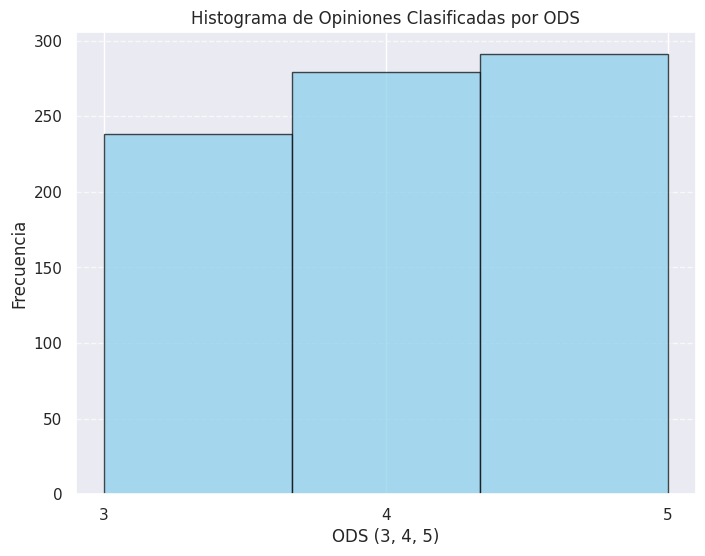

In [ ]:
# Crear el histograma de las categorías
plt.figure(figsize=(8, 6))
plt.hist(nb_y_pred, bins=3, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('ODS (3, 4, 5)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Opiniones Clasificadas por ODS')
plt.xticks([3, 4, 5])  # Ajustamos los ticks al ODS 3, 4 y 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

>> La matriz de confusión del Algoritmo de Naive Bayes es:



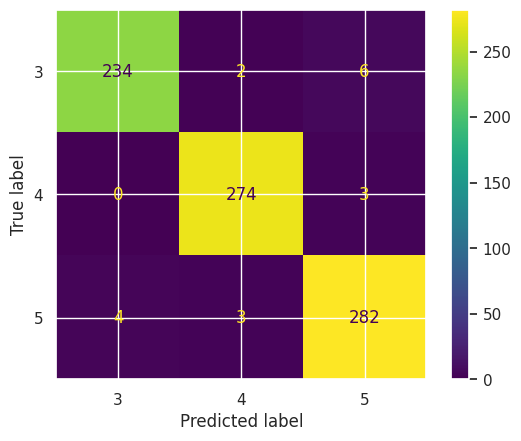


>> Classification Report:
              precision    recall  f1-score   support

           3       0.98      0.97      0.97       242
           4       0.98      0.99      0.99       277
           5       0.97      0.98      0.97       289

    accuracy                           0.98       808
   macro avg       0.98      0.98      0.98       808
weighted avg       0.98      0.98      0.98       808


>> Las métricas del modelo generado son las siguientes:

Accuracy: 0.9777227722772277
Precision: 0.9777604840015515
Recall: 0.9777227722772277
F1 Score: 0.9777128399704272


In [ ]:
# Evaluación del modelo
print(">> La matriz de confusión del Algoritmo de Naive Bayes es:\n")
cm = confusion_matrix(y_test, nb_y_pred, labels=mejor_nb.classes_)
# Visualiza la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mejor_nb.classes_)
disp.plot()
plt.show()

# Informe de clasificación
print("\n>> Classification Report:")
print(classification_report(y_test, nb_y_pred))
# Métricas de rendimiento
accuracy = accuracy_score(y_test, nb_y_pred)
precision = precision_score(y_test, nb_y_pred, average='weighted')
recall = recall_score(y_test, nb_y_pred, average='weighted')
f1 = f1_score(y_test, nb_y_pred, average='weighted')

# Mostrar los resultados
print("\n>> Las métricas del modelo generado son las siguientes:\n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

## 5.2 Algoritmo 2 (Regresión Logística Multinominal) - Santiago Jaimes

La **Regresión Logística** es un modelo de clasificación utilizado para predecir la probabilidad de una clase binaria o multinomial. El modelo utiliza una función sigmoide (o logística) para modelar la probabilidad de que una observación pertenezca a una clase específica.

La función de pérdida en la regresión logística es la función de pérdida logística, que busca minimizar el error entre las predicciones del modelo y las etiquetas verdaderas. El proceso de entrenamiento ajusta los coeficientes del modelo para minimizar esta función de pérdida. (GeeksForGeeks, 2024)

<u>**Hiperparámetros clave**</u>

* **C**: Este es el parámetro de regularización. La regularización se utiliza para evitar el sobreajuste mediante la penalización de los coeficientes del modelo. Un valor pequeño de C implica una fuerte regularización, mientras que un valor grande de C implica menos regularización. En esencia, C equilibra entre ajustar el modelo a los datos y mantener los coeficientes del modelo en valores bajos.

* **solver**: Este parámetro especifica el algoritmo de optimización utilizado para ajustar los parámetros del modelo. Los solvers que soportan clasificación multiclase más comunes son:

  * <u>`newton-cg`</u>: Este método utiliza el método de Newton-Raphson para optimizar la función de pérdida.

  * <u>`lbfgs`</u>: El algoritmo L-BFGS (Limited-memory Broyden-Fletcher-Goldfarb-Shanno) es una variante del método de Newton que utiliza menos memoria, por lo que es conveniente para problemas de alta dimensionalidad, como este.

* **multi_class**: Este parámetro determina el tipo de problema de clasificación. En este caso, se optó por dejarlo como `multinomial`: Trata el problema de clasificación como un único problema multinomial, donde todas las clases se consideran conjuntamente.

* **max_iter**: Este parámetro especifica el número máximo de iteraciones que el solver realizará durante el proceso de optimización. Ajustar este valor puede ayudar a asegurar que el modelo converja adecuadamente a una solución.

In [ ]:
# Inicializar el modelo de regresión logística multinomial
logreg_model = LogisticRegression(multi_class="multinomial", solver="lbfgs")
# Definir los hiperparámetros a evaluar
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
    'solver': ['newton-cg', 'lbfgs'],  # Solvers que soportan multiclase
    'multi_class': ['multinomial'],  # Para indicar que es multinomial
    'max_iter': [100, 200, 500]  # Iteraciones para la convergencia
}

# Crear objetos de validación cruzada y de Grid Search
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
grid_logreg = GridSearchCV(logreg_model, param_grid, cv=kfold, n_jobs=-1)

# Entrenar el Grid Search
grid_logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LogisticRegression(multi_class='multinomial'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'lbfgs']})

Se utiliza el GridSearch para sintonizar los hiperparámetros y encontrar el mejor modelo.

In [ ]:
# Seleccionar el mejor modelo con los mejores parámetros
print("Mejores parámetros: {}".format(grid_logreg.best_params_))
mejor_logreg = grid_logreg.best_estimator_

# Make predictions on the test set
logreg_y_pred = mejor_logreg.predict(X_test)

Mejores parámetros: {'C': 100, 'max_iter': 100, 'multi_class': 'multinomial', 'solver': 'newton-cg'}


Se visualiza en un histograma cuántos registros del conjunto de prueba se clasificaron en cada categoría.

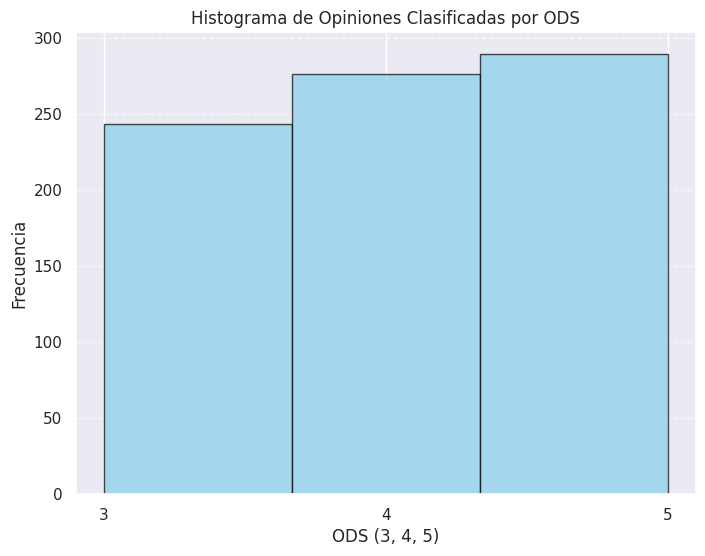

In [ ]:
# Crear el histograma de las categorías
plt.figure(figsize=(8, 6))
plt.hist(logreg_y_pred, bins=3, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('ODS (3, 4, 5)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Opiniones Clasificadas por ODS')
plt.xticks([3, 4, 5])  # Ajustamos los ticks al ODS 3, 4 y 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

>> La matriz de confusión del Algoritmo de Regresión Logística Multinominal es:



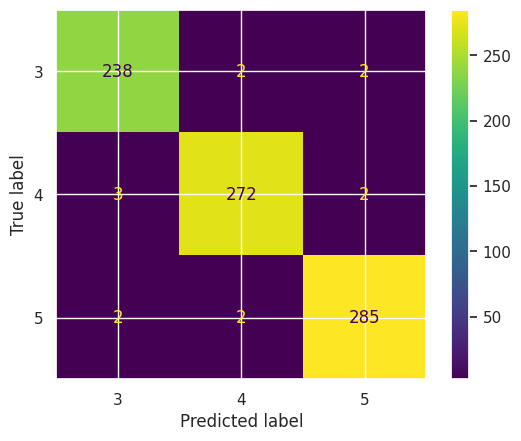


>> Classification Report:
              precision    recall  f1-score   support

           3       0.98      0.98      0.98       242
           4       0.99      0.98      0.98       277
           5       0.99      0.99      0.99       289

    accuracy                           0.98       808
   macro avg       0.98      0.98      0.98       808
weighted avg       0.98      0.98      0.98       808


>> Las métricas del modelo generado son las siguientes:

Accuracy: 0.9839108910891089
Precision: 0.9839184200223565
Recall: 0.9839108910891089
F1 Score: 0.9839123031167417


In [ ]:
# Evaluación del modelo
print(">> La matriz de confusión del Algoritmo de Regresión Logística Multinominal es:\n")
cm = confusion_matrix(y_test, logreg_y_pred, labels=mejor_logreg.classes_)
# Visualiza la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mejor_logreg.classes_)
disp.plot()
plt.show()

# Informe de clasificación
print("\n>> Classification Report:")
print(classification_report(y_test, logreg_y_pred))
# Métricas de rendimiento
accuracy = accuracy_score(y_test, logreg_y_pred)
precision = precision_score(y_test, logreg_y_pred, average='weighted')
recall = recall_score(y_test, logreg_y_pred, average='weighted')
f1 = f1_score(y_test, logreg_y_pred, average='weighted')

# Mostrar los resultados
print("\n>> Las métricas del modelo generado son las siguientes:\n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

## 5.3 Algoritmo 3 (Random Forest) - Nicolás Rincón

El algoritmo de **Random Forest** es un método de aprendizaje supervisado de ensamble que crea un conjunto de múltiples árboles de decisión para mejorar el rendimiento de un modelo y reducir su riesgo de sobreajuste.

En lugar de entrenar un solo árbol, entrena varios árboles de decisión independientes utilizando diferentes subconjuntos de datos mediante el muestreo con reemplazo (técnica llamada bootstrap). Cada árbol toma decisiones basadas en la división de los datos según un criterio como la impureza de Gini o la ganancia de información (entropy).

Para una predicción final, Random Forest utiliza la votación mayoritaria de las predicciones individuales de cada árbol. Al promediar o tomar la moda de los resultados de todos los árboles, el modelo tiende a ser más robusto y menos propenso a sobreajustarse que un único árbol de decisión. Esto es crucial para prevenir el sobreajuste, ya que los árboles individuales pueden ajustarse demasiado a los detalles de las muestras, pero al combinarlos, se compensa el sesgo de cada árbol. (DataCamp, 2023)

<u>**Hiperparámetros clave**</u>

* **n_estimators**: Aumenta la cantidad de árboles, mejorando la estabilidad y precisión, pero incrementa el tiempo de entrenamiento. Con un número elevado de árboles, la precisión disminuye, pero el sobreajuste se controla.

* **max_depth**: Controla la profundidad máxima de los árboles. Profundidades mayores permiten capturar más patrones complejos, pero también aumentan el riesgo de sobreajuste. Al limitar la profundidad, el modelo se vuelve más general y puede funcionar mejor con nuevos datos.

* **bootstrap**: Indica si los árboles se entrenan con muestras obtenidas con reemplazo. Si es verdadero (`True`), los datos se distribuyen entre los árboles aleatoriamente, generando diversidad en ellos. Sin embargo, si es falso (`False`), los árboles se entrenan con todos los datos, lo que reduce la diversidad de todo el conjunto de árboles, pero puede hacer que sean más precisos individualmente.

* **criterion**: Define la métrica usada para evaluar la calidad de las divisiones en los nodos de los árboles. El criterio `"gini"` mide la impureza de las divisiones, mientras que `"entropy"` mide la ganancia de información en cada división. Ambos afectan cómo los árboles seleccionan las divisiones de los datos, en cada test de atributo individual.

In [ ]:
# Inicializar el modelo de Random Forest
rf_model = RandomForestClassifier()
# Definir los hiperparámetros a evaluar
param_grid = {
    'n_estimators': [50, 100, 150],        # Número de árboles en el bosque
    'max_depth': [None, 5, 10],            # Profundidad máxima de los árboles
    'bootstrap': [True, False],            # Si utilizar o no el muestreo con reemplazo
    'criterion': ['gini', 'entropy'],      # Función para medir la calidad de la división
}

# Crear objetos de validación cruzada y de Grid Search
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
grid_rf = GridSearchCV(rf_model, param_grid, cv=kfold, n_jobs=-1)

# Entrenar el Grid Search
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'n_estimators': [50, 100, 150]})

Se utiliza el GridSearch para sintonizar los hiperparámetros y encontrar el mejor modelo.

In [ ]:
# Seleccionar el mejor modelo con los mejores parámetros
print("Mejores parámetros: {}".format(grid_rf.best_params_))
mejor_rf = grid_rf.best_estimator_

# Make predictions on the test set
rf_y_pred = mejor_rf.predict(X_test)

Mejores parámetros: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'n_estimators': 50}


Se visualiza en un histograma cuántos registros del conjunto de prueba se clasificaron en cada categoría.

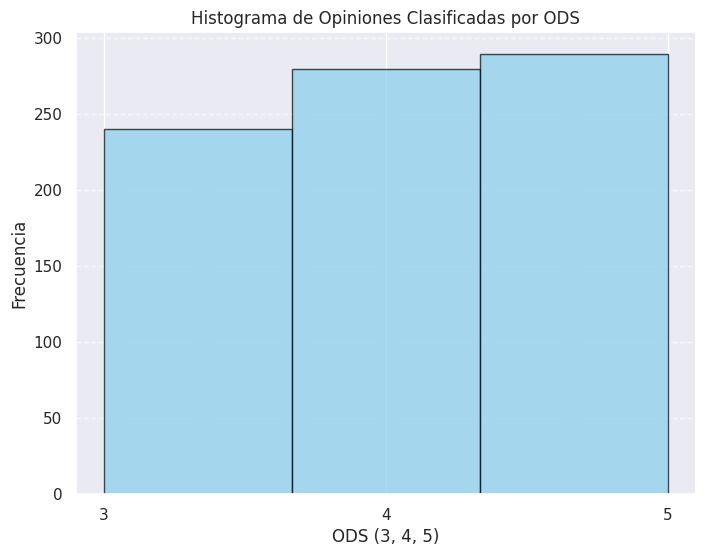

In [ ]:
# Crear el histograma de las categorías
plt.figure(figsize=(8, 6))
plt.hist(rf_y_pred, bins=3, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('ODS (3, 4, 5)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Opiniones Clasificadas por ODS')
plt.xticks([3, 4, 5])  # Ajustamos los ticks al ODS 3, 4 y 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

>> La matriz de confusión del Algoritmo de Random Forest es:



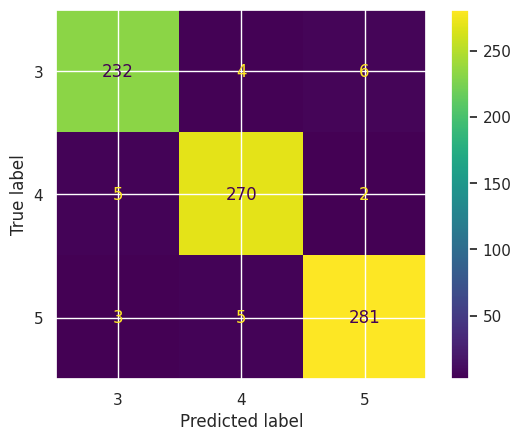


>> Classification Report:
              precision    recall  f1-score   support

           3       0.97      0.96      0.96       242
           4       0.97      0.97      0.97       277
           5       0.97      0.97      0.97       289

    accuracy                           0.97       808
   macro avg       0.97      0.97      0.97       808
weighted avg       0.97      0.97      0.97       808


>> Las métricas del modelo generado son las siguientes:

Accuracy: 0.969059405940594
Precision: 0.9690567443841158
Recall: 0.969059405940594
F1 Score: 0.9690488026981151


In [ ]:
# Evaluación del modelo
print(">> La matriz de confusión del Algoritmo de Random Forest es:\n")
cm = confusion_matrix(y_test, rf_y_pred, labels=mejor_rf.classes_)
# Visualiza la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mejor_rf.classes_)
disp.plot()
plt.show()

# Informe de clasificación
print("\n>> Classification Report:")
print(classification_report(y_test, rf_y_pred))
# Métricas de rendimiento
accuracy = accuracy_score(y_test, rf_y_pred)
precision = precision_score(y_test, rf_y_pred, average='weighted')
recall = recall_score(y_test, rf_y_pred, average='weighted')
f1 = f1_score(y_test, rf_y_pred, average='weighted')

# Mostrar los resultados
print("\n>> Las métricas del modelo generado son las siguientes:\n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# 6 Selección del mejor modelo

Como grupo, evaluamos los tres modelos de clasificación previamente descritos.

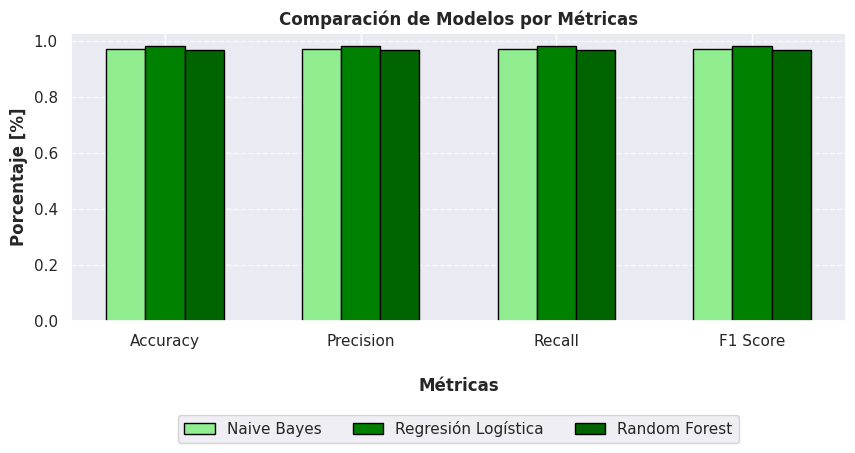

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

naive_bayes = [0.970297, 0.970296, 0.970297, 0.970275]
logistic_regression = [0.980198, 0.980226, 0.980198, 0.980203]
random_forest = [0.969059, 0.969098, 0.969059, 0.969032]

bar_width = 0.2

r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10, 6))
plt.bar(r1, naive_bayes, color='lightgreen', width=bar_width, edgecolor='black', label='Naive Bayes')
plt.bar(r2, logistic_regression, color='green', width=bar_width, edgecolor='black', label='Regresión Logística')
plt.bar(r3, random_forest, color='darkgreen', width=bar_width, edgecolor='black', label='Random Forest')

plt.xlabel('Métricas', fontweight='bold', labelpad=20)
plt.ylabel('Porcentaje [%]', fontweight='bold')
plt.title('Comparación de Modelos por Métricas', fontweight='bold')

plt.xticks([r + bar_width for r in range(len(metrics))], metrics)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)

plt.subplots_adjust(bottom=0.4)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Finalmente, seleccionamos el modelo de ***Regresión Logística Multinomial***, que obtuvo las métricas más altas en todas las áreas, destacándose con un F1 Score de 0.9826 (el cual fue nuestro criterio de decisión). Al priorizar el F1 Score (0.9826), nos aseguramos de seleccionar un modelo que balanceara bien tanto la Precision como el Recall. Esto es fundamental cuando buscamos un buen rendimiento tanto en la correcta identificación de los textos de cada ODS como en evitar perder información relevante.

Dado que los datos de entrenamiento estaban balanceados, la métrica de Accuracy (Exactitud) sigue siendo un buen indicador de rendimiento general. El Accuracy del modelo de Regresión Logística Multinomial fue de 0.9826, lo que significa que el 98.26% de las predicciones realizadas fueron correctas en términos de clasificar los textos en las categorías correctas de ODS 3, 4 y 5. Esta métrica es útil para darnos una visión global de qué tan bien el modelo clasifica, pero no toma en cuenta cómo se comporta en cada clase individual.

Además, la Precision (0.9826) nos indica el porcentaje de predicciones correctas entre todas las instancias que el modelo etiquetó como pertenecientes a una categoría en particular. En este caso, casi el 98.26% de los textos que fueron clasificados como ODS 3, 4 o 5 eran efectivamente de esa categoría. Esto es importante en escenarios donde los falsos positivos son costosos, pero en nuestro caso queríamos también asegurar que no dejáramos de identificar textos relevantes.

Por esta razón, el Recall (0.9826) también fue clave, ya que mide la capacidad del modelo para identificar correctamente las instancias positivas dentro de cada categoría. En nuestro caso, esto significa que el modelo fue capaz de recuperar el 98.26% de los textos que efectivamente pertenecían a las categorías ODS 3, 4 o 5, evitando que se pierdan textos relevantes.

In [ ]:
modelo = mejor_logreg

# 7 Análisis

Se realiza el análisis cualitativo y cuantitativo a partir del mejor modelo, el de Regresión Logística Multinominal. Para ello, se obtienen los atributos relevantes de la regresión (que corresponderán a las palabras tokenizadas) para cada una de las clases junto con sus coeficientes.

In [ ]:
feature_names = tf_idf.get_feature_names_out()
coefficients = modelo.coef_

In [ ]:
def get_top_words_for_class(class_index):
    # Obtener los coeficientes de regresión de cada clase
    class_coef = coefficients[class_index]
    # Obtener los primeros 20 y últimos 20
    top_indices = np.argsort(class_coef)[-20:]
    bottom_indices = np.argsort(class_coef)[:20]
    # Combinar en una tupla de listas de tuplas
    top_words = [(feature_names[i], class_coef[i]) for i in top_indices]
    bottom_words = [(feature_names[i], class_coef[i]) for i in bottom_indices]
    return top_words, bottom_words

# Coeficientes de Regresión de palabras más y menos relevantes para cada clase
top_words_class_3 = get_top_words_for_class(0)
top_words_class_4 = get_top_words_for_class(1)
top_words_class_5 = get_top_words_for_class(2)

## 7.1 Análisis Cuantitativo

Se generó un código para crear un gráfico de barras que permite visualizar los coeficientes de las 10 palabras más relevantes y las 10 menos relevantes a la hora de predecir la categoría 3, relacionada con el ODS de Salud y Bienestar.

Cabe resaltar que la gráfica muestra las primeras 10 de menor coeficiente y las primeras 10 de mayor coeficiente. Es decir, en la mitad habría muchas más palabras que son procesadas y modeladas con un determinado coeficiente de regresión intermedio.

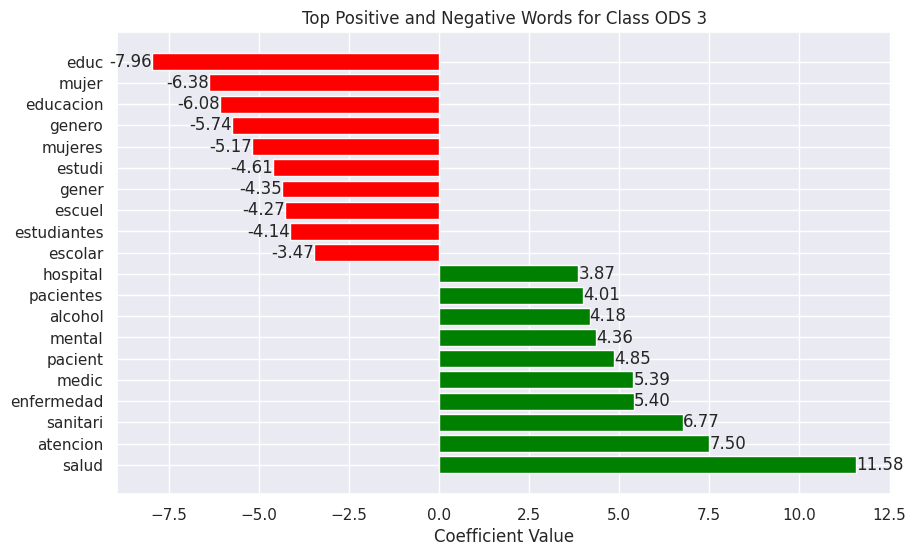

In [ ]:
# Example data for top and bottom words
top_words3 = top_words_class_3[0].copy()[::-1]
bottom_words3 = top_words_class_3[1].copy()[::-1]

# Separate words and coefficients
listado_grande3 = top_words3[:10] + bottom_words3[-10:]
listado_words3 = []
listado_coeffs3 = []

for tupla in listado_grande3:
  words, coeffs = zip(tupla)
  listado_words3.append(words[0])
  listado_coeffs3.append(coeffs[0])

colors = ['green'] * len(top_words3[0:10]) + ['red'] * len(bottom_words3[0:10])

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(np.array(listado_words3), np.array(listado_coeffs3), color=colors)
plt.xlabel('Coefficient Value')
plt.title('Top Positive and Negative Words for Class ODS 3')

# Etiquetas en la gráfica
for bar in bars[0:10]:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left')

for bar in bars[10:]:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='right')

plt.show()

Como se puede apreciar, los features cuya codificación resulta más eficiente para clasificar un texto como parte de la categoría de "Salud y Bienestar" son:

|Palabra|Coeficiente de Regresión|
|-|-|
|salud|11.19|
|atencion|7.31|
|sanitari|6.46|

Al tener coeficientes positivos, esto indica que su codificación tiene un efecto positivo sobre el modelo de regresión logística. La magnitud de los coeficientes refleja la fuerza de la asociación entre estas palabras y la categoría "Salud y Bienestar", lo que permite al modelo hacer predicciones más precisas y coherentes en función de la información textual proporcionada.

Es decir, un texto que tiene las palabras "salud" y "atención" va a tender a ser clasificado como parte de la categoría 3, más por la presencia de la palabra "salud" que por la presencia de la palabra "atención". Se destacan las demás palabras y raíces que se pueden apreciar en el gráfico con color verde, pues son las que mayor efecto tienen sobre dicha clasificación.

Así como los coeficientes positivos indican un efecto positivo sobre el valor de la regresión logística, los coeficientes de regresión negativos indican lo contrario: palabras cuya presencia reduce la probabilidad de que el texto sea de la categoría 3. Las tres primeras son:

|Palabra|Coeficiente de Regresión|
|-|-|
|educ|-7.81|
|mujer|-6.60|
|genero|-5.83|

De las anteriores, la que tiene el mayor efecto negativo es la raíz semántica "educ" que se puede encontrar en palabras como "educación", "educador(a)", "educado(a)", entre otras. Así mismo, las palabras "mujer" y "género" tienen un efecto negativo sobre la clasificación en la categoría 3.

Esto tiene sentido en vista de que dichas palabras se asocian más a los otros ODS (4: Educación de Calidad y 5: Igualdad de Género). Las demás palabras que tienen efectos negativos más fuertes sobre esta clasificación se muestran en el gráfico con las barras de color rojo.


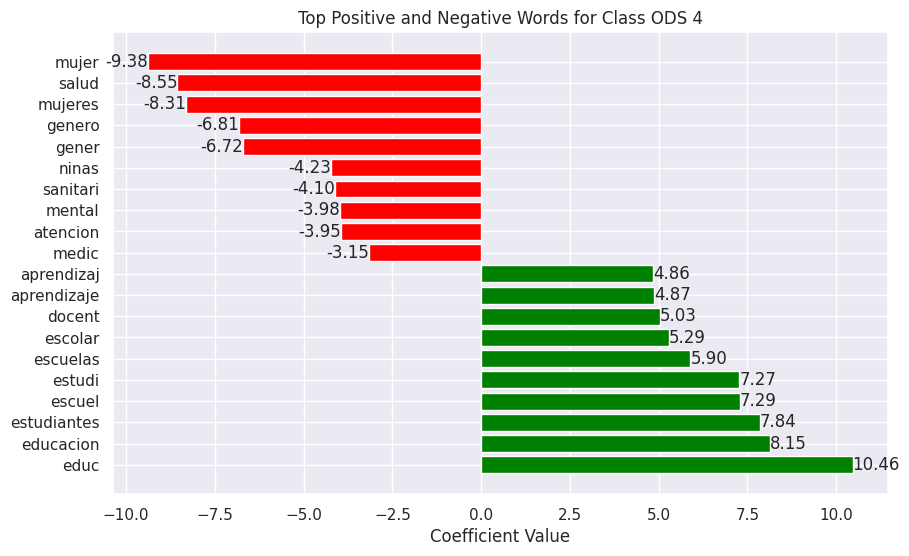

In [ ]:
# Example data for top and bottom words
top_words4 = top_words_class_4[0].copy()[::-1]
bottom_words4 = top_words_class_4[1].copy()[::-1]

# Separate words and coefficients
listado_grande4 = top_words4[:10] + bottom_words4[-10:]
listado_words4 = []
listado_coeffs4 = []

for tupla in listado_grande4:
  words, coeffs = zip(tupla)
  listado_words4.append(words[0])
  listado_coeffs4.append(coeffs[0])

colors = ['green'] * len(top_words4[0:10]) + ['red'] * len(bottom_words4[0:10])

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(np.array(listado_words4), np.array(listado_coeffs4), color=colors)
plt.xlabel('Coefficient Value')
plt.title('Top Positive and Negative Words for Class ODS 4')

# Etiquetas en la gráfica
for bar in bars[0:10]:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left')

for bar in bars[10:]:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='right')

plt.show()

En el caso de la categoría 4, relacionada con Educación de Calidad, los features que tienen un mayor efecto positivo sobre la decisión de que un texto pertenezca a dicha categoría son, respectivamente:

* educ
* educacion
* estudiantes
* estudi

Por otro lado, las palabras con mayor efecto negativo son:

* mujer
* salud
* mujeres
* genero

Un contraste interesante es que, en el gráfico de barras de la Categoría 3, la palabra "salud" tenía el coeficiente positivo más alto a favor (11.19), mientras que en el gráfico de la Categoría 4, tiene el segundo más negativo en contra (-8.36). Es decir, la presencia de "salud" en un texto tiende a inclinar la balanza muchísimo a favor de la categoría 3 y en contra de la categoría 4.

Los coeficientes de regresión positivos y negativos se pueden consultar explícitamente (redondeados a dos decimales) sobre la gráfica.

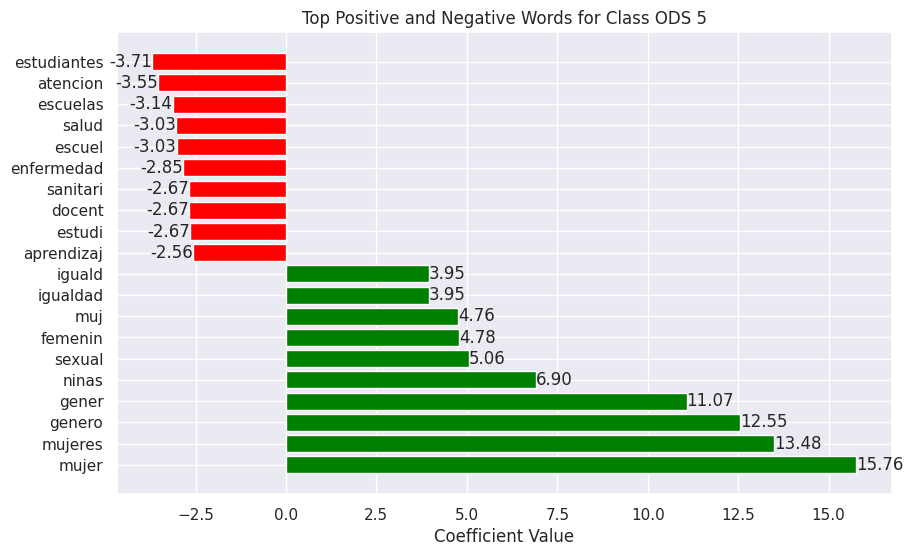

In [ ]:
# Example data for top and bottom words
top_words5 = top_words_class_5[0].copy()[::-1]
bottom_words5 = top_words_class_5[1].copy()[::-1]

# Separate words and coefficients
listado_grande5 = top_words5[:10] + bottom_words5[-10:]
listado_words5 = []
listado_coeffs5 = []

for tupla in listado_grande5:
  words, coeffs = zip(tupla)
  listado_words5.append(words[0])
  listado_coeffs5.append(coeffs[0])

colors = ['green'] * len(top_words5[0:10]) + ['red'] * len(bottom_words5[0:10])

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(np.array(listado_words5), np.array(listado_coeffs5), color=colors)
plt.xlabel('Coefficient Value')
plt.title('Top Positive and Negative Words for Class ODS 5')

# Etiquetas en la gráfica
for bar in bars[0:10]:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left')

for bar in bars[10:]:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='right')

plt.show()

Finalmente, para la categoría 5, se tienen las siguientes palabras como más relevantes:

* mujer
* mujeres
* genero

Cabe resaltar que los coeficientes de regresión de estas tres palabras tienen valores de 15.36, 13.06 y 12.28, respectivamente. En comparación con los coeficientes positivos más grandes de las anteriores categorías, estos tres valores son mayores.

Esto indica que, la presencia de las palabras mencionadas anteriormente tiende a inclinar al modelo de regresión a predecir la categoría 5 con mucha mayor fuerza que la que la palabra "salud" le indica para predecir la categoría 3, por ejemplo.

Así mismo, se observa que las palabras con coeficientes más negativos son:

|Palabra|Coeficiente de Regresión|
|-|-|
|atencion|-3.62|
|estudiantes|-3.57|
|escuelas|-2.90|
|salud|-2.84|

La primera y la cuarta normalmente hacen referencia a temas relacionados con el sector de la salud, toda vez que la segunda y la tercera hacen referencia a temas relacionados con educación. Sin embargo, es notable que el valor de los coeficientes negativos no es tan alto en magnitud como los coeficientes positivos, ni como los coeficientes negativos de las otras dos categorías.

Esto implica que dichas palabras no tienen un efecto tan fuerte sobre la no-clasificación de un texto como categoría 5, por lo cual, algunos de los textos del conjunto de entrenamiento que fueron etiquetados como 5 debían tener algunas de estas palabras en su cuerpo. Eso explicaría por qué son coeficientes negativos relativamente pequeños.

Sin embargo, la baja negatividad se compensa suficientemente con los valores altos en los coeficientes positivos, que los superan aproximadamente siete veces en magnitud. Es decir, en el caso de la categoría 5, es más probable que el modelo tienda a asignar esta categoría por la presencia de las palabras favorables a que el modelo tienda a rechazarla por la presencia de las palabras no favorables.

## 7.2 Análisis Cualitativo

Se realiza a continuación, una Word Cloud (nube de palabras) para cada una de las categorías. En una nube de palabras, se muestra una lluvia de todas las palabras relevantes para el contexto de cada categoría. Adicionalmente, se muestra más grande (con una tipografía de mayor tamaño) aquellas palabras que son más relevantes, es decir, las que tienen mayor coeficiente de regresión.

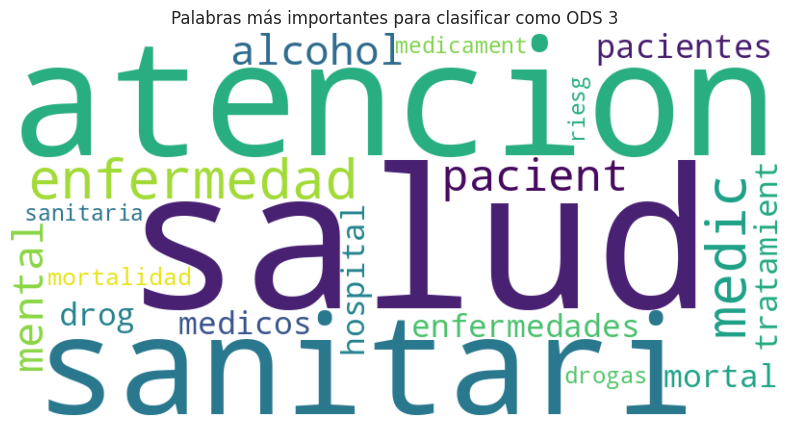

In [ ]:
# Combine words with their coefficients
word_importances3 = {word: abs(coef) for word, coef in top_words3}

# Generate a word cloud
wordcloud3 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_importances3)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más importantes para clasificar como ODS 3')
plt.show()

Para la categoría 3, efectivamente, todas las palabras y raíces mostradas en la nube de palabras están relacionadas con temas del sector de la salud. Por ejemplo, se tienen palabras como "salud", siendo la más relevante, "pacient(e)", "sanitario(a)", "mortalidad", "enfermedad", entre otras.

Esto sugiere que los textos que contengan este tipo de palabras se van a clasificar correctamente como categoría 3 debido al efecto positivo de todas las palabras mostradas en la nube.

Sin embargo, palabras con menos relevancia como "consum(o)" y "población" tienen menor relevancia puesto que no son necesariamente exclusivas del sector de la salud. Se podría hablar de consumo y de población en textos que traten sobre agentes educativos o sobre poblaciones en situación de desigualdad. Por ello, tienen menor relevancia, pero aún sigue siendo positiva.

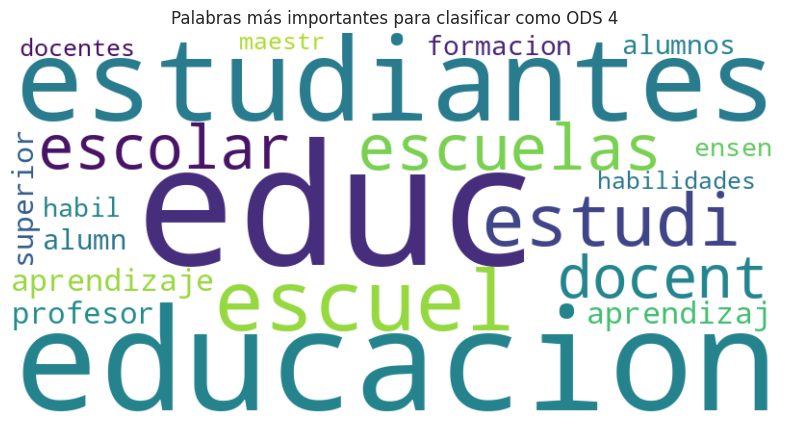

In [ ]:
# Combine words with their coefficients
word_importances4 = {word: abs(coef) for word, coef in top_words4}

# Generate a word cloud
wordcloud4 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_importances4)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más importantes para clasificar como ODS 4')
plt.show()

Para la cateogoría 4, la nube de palabras muestra raíces y palabras asociadas con el sector de educación de forma bastante exclusiva. Prácticamente todas las palabras con mayor relevancia y que se encuentran en mayor tamaño en la nube tienen que ver con educación.

Nuevamente, las palabras con menor relevancia (las más pequeñas) como "superior", "hábil", "aprendizaj(e)" o "formación" pueden estar relacionadas con la enseñanza de la profesión médica o con temas de discriminación hacia la mujer, que se pueden tratar en textos pertenecientes a las categorías 3 y 5. Por ende, no tienen tanta relevancia sin dejar de tener un efecto positivo sobre la clasificación.

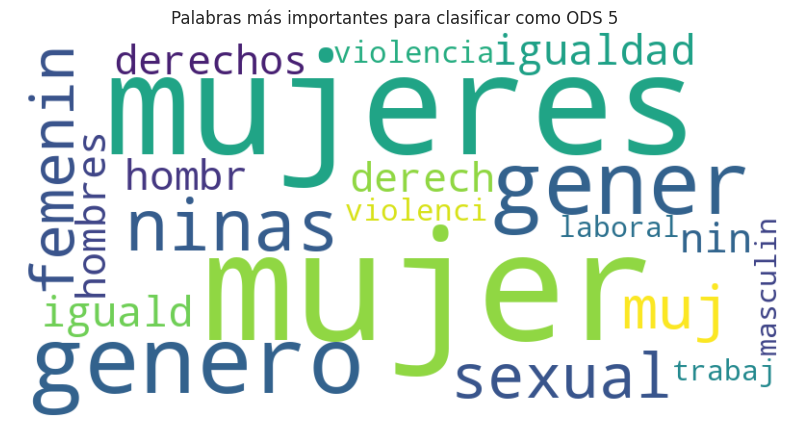

In [ ]:
# Combine words with their coefficients
word_importances5 = {word: abs(coef) for word, coef in top_words5}

# Generate a word cloud
wordcloud5 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_importances5)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud5, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más importantes para clasificar como ODS 5')
plt.show()

Finalmente, para la categoría 5 relacionada con Igualdad de Género, se observa un comportamiento similar de las palabras y raíces semánticas con mayor relevancia. Se puede apreciar que tienen un efecto positivo mayor palabras como "género", "mujer", "derech(o)", "ni(ñ)as". En esta oportunidad, no se distingue palabras con menor relevancia que podrían estar contenidas en textos de otras categorías.

Sin embargo, esto reafirma la inferencia realizada en el análisis cuantitativo respecto al elevado efecto positivo de clasificación a partir de las palabras relevantes contra el bajo efecto negativo de no-clasificación a partir de las palabras poco relevantes. La nube de palabras refleja que para la categoría 5 tienen considerablemente mayor impacto las palabras con mayor coeficiente de regresión.

## 7.3 Consideración para la empresa

Al analizar los resultados obtenidos para el proyecto con el Fondo de Poblaciones de las Naciones Unidas (UNFPA), cuyo objetivo es relacionar automáticamente opiniones ciudadanas con los Objetivos de Desarrollo Sostenible (ODS) 3, 4 y 5, se observa un excelente desempeño del modelo implementado. En particular, el modelo de clasificación, basado en regresión logística, muestra un F1-score del 98.26%, lo que indica un equilibrio casi perfecto entre precisión y exhaustividad en la identificación correcta de las opiniones asociadas a estos ODS.

El análisis tanto cuantitativo como cualitativo respalda la efectividad del modelo. Las palabras que el modelo prioriza como relevantes e irrelevantes para la clasificación de las opiniones hacia los ODS 3 (Salud y Bienestar), ODS 4 (Educación de Calidad) y ODS 5 (Igualdad de Género) presentan una lógica consistente con los temas que cubren estos objetivos. Los coeficientes de regresión asignados a estas palabras refuerzan la lógica detrás del comportamiento del modelo, lo que asegura que las clasificaciones son tanto precisas como comprensibles.

Si bien el desempeño actual del modelo es excepcional, con un error promedio muy bajo, se puede sugerir continuar monitoreando y ajustando el modelo a medida que se recolecten más datos o que las opiniones ciudadanas abarquen una mayor diversidad de temas. No obstante, consideramos que la versión actual ya es una herramienta muy efectiva que permitirá al UNFPA automatizar el análisis de opiniones y obtener valiosos insights para su labor en el cumplimiento de los ODS.

# 8 Generación de predicciones

In [ ]:
validation_data = pd.read_excel("/content/drive/MyDrive/UNIVERSIDAD DE LOS ANDES/9. Noveno Semestre - 2024-20/ISIS3301 - Inteligencia de Negocios/Proyectos/TestODScat_345.xlsx")
validation_pipeline = validation_data.copy()

# Procesar los datos de validación con el pipeline
X_validation = pipeline_datos(validation_pipeline)

In [ ]:
# Predecir las etiquetas de los datos de validación
y_validation = modelo.predict(X_validation)

y_validation_df = pd.DataFrame({'sdg': y_validation})
respuesta_df = pd.concat([validation_pipeline['Textos_espanol'], y_validation_df], axis=1)
respuesta_df

,Textos_espanol,sdg
0,"Han examinado la contribuciÃ³n de las universidades y las instituciones de educaciÃ³n terciaria al desarrollo del capital humano y las competencias, la transferencia de tecnologÃa y la innovaciÃ³n empresarial, el desarrollo social, cultural y medioambiental, y la creaciÃ³n de capacidad regional. El proceso de revisiÃ³n ha facilitado la creaciÃ³n de asociaciones en ciudades y regiones al reunir a instituciones de educaciÃ³n terciaria y organismos pÃºblicos y privados para identificar objetivos estratÃ©gicos y trabajar juntos para alcanzarlos. Complementa las revisiones que se han llevado a cabo en la región transfronteriza México-Estados Unidos, de gran importancia estratégica y económica, como las de Nuevo León, la región Paso del Norte y, más recientemente, la del sur de Arizona (2011), junto al estado de Sonora.",4
1,"En la última década, y en particular desde 2010, el número de altas per cápita ha tendido a disminuir, y ahora está en línea con la media de la OCDE mencionada anteriormente. Por ejemplo, los habitantes de zonas rurales representan el 43% de la población, pero sólo el 32% de las altas hospitalarias. A falta de información complementaria, no es posible determinar si esta diferencia indica o no disparidades en el acceso de las poblaciones rurales y, en caso afirmativo, si las causas son geográficas, culturales o infraestructurales. No parece que se recojan datos sobre el acceso a la atención desde el punto de vista del paciente, lo que ayudaría a comprender la naturaleza de los obstáculos al acceso (y las soluciones). En general, no es posible determinar con los datos disponibles si los ingresos o las características socioeconómicas de los pacientes influyen a la hora de llegar a las puertas del hospital o de ser ingresado. El acceso desigual probablemente se deba también a la incapacidad de los centros de las distintas regiones para prestar los mismos servicios.",3
2,"¿En qué países los estudiantes de alto rendimiento se sienten atraídos por la docencia? Las encuestas de docentes en servicio a menudo muestran que los maestros actuales están muy motivados por los beneficios intrínsecos de la enseñanza: trabajar con niños y ayudarlos a desarrollarse y hacer una contribución a la sociedad, mientras que los estudios que encuestan a grandes grupos de graduados sobre sus opciones de carrera muestran que la los salarios relativos de las ocupaciones de los graduados juegan un papel en sus elecciones: si los salarios de los docentes hubieran sido más altos, más ""docentes potenciales"" habrían considerado seriamente una carrera en la enseñanza. A nivel de país, los resultados indican que tanto los salarios de los docentes como la estatus social de la profesión docente se asocian positivamente con las expectativas de los estudiantes de trabajar como docentes.",4
3,"A raíz de su preocupación por el hecho de que los médicos de todo el sistema sanitario japonés no fueran capaces de identificar los signos de sufrimiento psicológico que podrían ayudar a reducir los suicidios, la Asociación Médica Japonesa informa de que empezó a compartir información y orientaciones sobre la depresión con todos los médicos, primero en 2004 y luego de nuevo en 2009. En la actualidad, sólo se recogen indicadores sobre la tasa de reclusión y contención, y de ingresos involuntarios, por parte de los proveedores y a nivel prefectural. La información recopilada sistemáticamente sobre el sistema de atención de salud mental se limita a indicadores estructurales: instalaciones, número de personal, número de camas.",3
4,"1999|H5|, Ares Abalde, 2014[ij]. El pequeño número de estudiantes y docentes en estas escuelas da forma a las formas en que las escuelas pueden utilizar el tiempo de docentes y alumnos, y cómo estos se agrupan por grados y habilidades (Mulcahy, 2009[ii6i). Los padres pueden estar preocupados por el hecho de que sus hijos aprendan junto con niños de diferentes edades en el mismo salón de clases (Cornish, 2006[ii7j)

In [ ]:
# Exportar a un archivo en formato Excel
respuesta_df.to_excel('predicciones.xlsx', index=False)

In [ ]:
# Exportar a un archivo en formato CSV por si las moscas
respuesta_df.to_csv('predicciones.csv', index=False)

# 9 Referencias

**[1]** Awan, A.A. & Naviani, A. (2023). *Naive Bayes Classification Tutorial using Scikit-learn*. DataCamp. Disponible en: https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

**[2]** Geeks for Geeks. (2024). *Logistic Regression in Machine Learning*. Disponible en: https://www.geeksforgeeks.org/understanding-logistic-regression/

**[3]** Shafi, A. (2023). *Random Forest Classification with Scikit-Learn*. DataCamp. Disponible en: https://www.datacamp.com/tutorial/random-forests-classifier-python


# 10 Creación y Exportación del Pipeline

In [30]:
# Preprocesamiento de los datos
def pipeline_datos(df: pd.DataFrame):
    # Realizar una copia del conjunto de datos
    df_pipeline = df.copy()

    # Renombrar las columnas para que sean más descriptivas
    df_pipeline.rename(columns={'Textos_espanol': 'Textos'}, inplace=True)

    # Aplicar el preprocesamiento
    df_pipeline['words'] = df_pipeline['Textos'].apply(word_tokenize).apply(preprocessing)
    df_pipeline['words'] = df_pipeline['words'].apply(stem_and_lemmatize)
    df_pipeline['words'] = df_pipeline['words'].apply(lambda x: ' '.join(map(str, x)))

    return df_pipeline['words']

In [31]:
from sklearn.preprocessing import FunctionTransformer

pipeline = Pipeline([
    ('preprocesamiento', FunctionTransformer(pipeline_datos)),
    ('tfidf', TfidfVectorizer(max_features=10000)),
    ('clf', LogisticRegression(C=100, max_iter=100, multi_class='multinomial', solver='newton-cg'))
])

In [32]:
X_train, X_test = train_test_split(df_ods_textos, test_size=0.2, random_state=42)

pipeline.fit(X_train.drop(columns=['Categoria']), X_train['Categoria'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('preprocesamiento',
                 FunctionTransformer(func=<function pipeline_datos at 0x78dd5e9305e0>)),
                ('tfidf', TfidfVectorizer(max_features=10000)),
                ('clf',
                 LogisticRegression(C=100, multi_class='multinomial',
                                    solver='newton-cg'))])

In [34]:
y_pred = pipeline.predict(X_test)

# Informe de clasificación
print("Reporte de la Clasificación:\n")
print(classification_report(X_test['Categoria'], y_pred))

Reporte de la Clasificación:

              precision    recall  f1-score   support

           3       0.98      0.98      0.98       245
           4       0.98      0.99      0.99       266
           5       0.99      0.98      0.98       296

    accuracy                           0.98       807
   macro avg       0.98      0.98      0.98       807
weighted avg       0.98      0.98      0.98       807



In [35]:
joblib.dump(pipeline, 'pipeline.joblib')

# Cargar un pipeline desde un archivo JOBLIB
loaded_pipeline = joblib.load('pipeline.joblib')

In [47]:
validation_data = pd.read_excel("/content/drive/MyDrive/UNIVERSIDAD DE LOS ANDES/9. Noveno Semestre - 2024-20/ISIS3301 - Inteligencia de Negocios/Proyectos/TestODScat_345.xlsx")

val_pred = loaded_pipeline.predict_proba(validation_data)

# Obtener un DataFrame con los valores de Probabilidad de 3, 4 y 5 en decimal a 5 cifras significativas
pd.options.display.float_format = '{:.6g}'.format
val_pred_df = pd.DataFrame(val_pred, columns=['prob_3', 'prob_4', 'prob_5'])

# Concatenar con el texto y poner la predicción más probable (3, 4 o 5) en una columna llamada sdg
val_pred_df = pd.concat([validation_data['Textos_espanol'], val_pred_df], axis=1)
val_pred_df['sdg'] = loaded_pipeline.predict(validation_data)
val_pred_df


,Textos_espanol,prob_3,prob_4,prob_5,sdg
0,"Han examinado la contribuciÃ³n de las universidades y las instituciones de educaciÃ³n terciaria al desarrollo del capital humano y las competencias, la transferencia de tecnologÃa y la innovaciÃ³n empresarial, el desarrollo social, cultural y medioambiental, y la creaciÃ³n de capacidad regional. El proceso de revisiÃ³n ha facilitado la creaciÃ³n de asociaciones en ciudades y regiones al reunir a instituciones de educaciÃ³n terciaria y organismos pÃºblicos y privados para identificar objetivos estratÃ©gicos y trabajar juntos para alcanzarlos. Complementa las revisiones que se han llevado a cabo en la región transfronteriza México-Estados Unidos, de gran importancia estratégica y económica, como las de Nuevo León, la región Paso del Norte y, más recientemente, la del sur de Arizona (2011), junto al estado de Sonora.",0.00257938,0.992915,0.00450594,4
1,"En la última década, y en particular desde 2010, el número de altas per cápita ha tendido a disminuir, y ahora está en línea con la media de la OCDE mencionada anteriormente. Por ejemplo, los habitantes de zonas rurales representan el 43% de la población, pero sólo el 32% de las altas hospitalarias. A falta de información complementaria, no es posible determinar si esta diferencia indica o no disparidades en el acceso de las poblaciones rurales y, en caso afirmativo, si las causas son geográficas, culturales o infraestructurales. No parece que se recojan datos sobre el acceso a la atención desde el punto de vista del paciente, lo que ayudaría a comprender la naturaleza de los obstáculos al acceso (y las soluciones). En general, no es posible determinar con los datos disponibles si los ingresos o las características socioeconómicas de los pacientes influyen a la hora de llegar a las puertas del hospital o de ser ingresado. El acceso desigual probablemente se deba también a la incapacidad de los centros de las distintas regiones para prestar los mismos servicios.",0.994482,0.00348992,0.00202821,3
2,"¿En qué países los estudiantes de alto rendimiento se sienten atraídos por la docencia? Las encuestas de docentes en servicio a menudo muestran que los maestros actuales están muy motivados por los beneficios intrínsecos de la enseñanza: trabajar con niños y ayudarlos a desarrollarse y hacer una contribución a la sociedad, mientras que los estudios que encuestan a grandes grupos de graduados sobre sus opciones de carrera muestran que la los salarios relativos de las ocupaciones de los graduados juegan un papel en sus elecciones: si los salarios de los docentes hubieran sido más altos, más ""docentes potenciales"" habrían considerado seriamente una carrera en la enseñanza. A nivel de país, los resultados indican que tanto los salarios de los docentes como la estatus social de la profesión docente se asocian positivamente con las expectativas de los estudiantes de trabajar como docentes.",4.54285e-06,0.999905,9.02332e-05,4
3,"A raíz de su preocupación por el hecho de que los médicos de todo el sistema sanitario japonés no fueran capaces de identificar los signos de sufrimiento psicológico que podrían ayudar a reducir los suicidios, la Asociación Médica Japonesa informa de que empezó a compartir información y orientaciones sobre la depresión con todos los médicos, primero en 2004 y luego de nuevo en 2009. En la actualidad, sólo se recogen indicadores sobre la tasa de reclusión y contención, y de ingresos involuntarios, por parte de los proveedores y a nivel prefectural. La información recopilada sistemáticamente sobre el sistema de atención de salud mental se limita a indicadores estructurales: instalaciones, número de personal, número de camas.",0.999921,4.72275e-05,3.19558e-05,3
4,"1999|H5|, Ares Abalde, 2014[ij]. El pequeño número de estudiantes y docentes en estas escuelas da forma a las formas en que las escuelas pueden utilizar el tiempo de docentes y alumnos, y cómo estos se agrupan por grados y habilidades (Mulcahy, 2009[ii6i). Los padres 